# Working With Dates in Pandas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Datetime Types

In [5]:
pd.to_datetime('now')

Timestamp('2021-10-01 15:38:56.402096')

In [7]:
# pd.to_datetime('Jan:1:1970')

In [8]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [9]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [10]:
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [11]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## `.dt` accessor

In [18]:
df.date.dt.quarter

0      1
1      1
2      1
3      1
4      1
      ..
256    4
257    4
258    4
259    4
260    4
Name: date, Length: 261, dtype: int64

How many observations are there for each month? Each weekday?

In [22]:
df.date.dt.month.value_counts().sort_index()

1     23
2     20
3     21
4     22
5     23
6     20
7     23
8     22
9     21
10    23
11    21
12    22
Name: date, dtype: int64

In [24]:
df['month'] = df.date.dt.month

In [25]:
df.head()

,date,coffee_consumption,month
0,2019-01-01,14.301915,1
1,2019-01-02,12.905900,1
2,2019-01-03,10.046015,1
3,2019-01-04,6.354805,1
4,2019-01-07,8.545563,1


In [27]:
df.month.value_counts().sort_index()

1     23
2     20
3     21
4     22
5     23
6     20
7     23
8     22
9     21
10    23
11    21
12    22
Name: month, dtype: int64

In [30]:
pd.__version__

'1.2.4'

Use `.weekday_name()` if you are using pandas < 1.x

In [29]:
df['weekday'] = df.date.dt.day_name()
df.weekday.value_counts()

Tuesday      53
Wednesday    52
Friday       52
Monday       52
Thursday     52
Name: weekday, dtype: int64

## DateTime Indexes

In [31]:
df = df.set_index('date').sort_index()
df

,coffee_consumption,month,weekday
date,,,
2019-01-01,14.301915,1,Tuesday
2019-01-02,12.905900,1,Wednesday
2019-01-03,10.046015,1,Thursday
2019-01-04,6.354805,1,Friday
2019-01-07,8.545563,1,Monday
...,...,...,...
2019-12-25,12.250875,12,Wednesday
2019-12-26,7.513206,12,Thursday
2019-12-27,9.464345,12,Friday


In [32]:
# earliest + latest dates
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [37]:
# Month of March
df.loc['2019-03-01':'2019-03-13']

,coffee_consumption,month,weekday
date,,,
2019-03-01,9.109061,3,Friday
2019-03-04,9.054681,3,Monday
2019-03-05,9.915438,3,Tuesday
2019-03-06,11.254156,3,Wednesday
2019-03-07,5.680393,3,Thursday
2019-03-08,8.823756,3,Friday
2019-03-11,11.296137,3,Monday
2019-03-12,6.552509,3,Tuesday
2019-03-13,10.784550,3,Wednesday


In [ ]:
# Subset of march

### Resampling

Upsampling: (generally) increase # of rows + introduce nulls

In [43]:
by_day = df.asfreq('D')
by_day.head(10)

,coffee_consumption,month,weekday
date,,,
2019-01-01,14.301915,1.0,Tuesday
2019-01-02,12.905900,1.0,Wednesday
2019-01-03,10.046015,1.0,Thursday
2019-01-04,6.354805,1.0,Friday
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,8.545563,1.0,Monday
2019-01-08,9.410101,1.0,Tuesday
2019-01-09,7.219271,1.0,Wednesday


In [40]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,month,weekday,ffill,bfill
date,,,,,
2019-01-01,14.301915,1.0,Tuesday,14.301915,14.301915
2019-01-02,12.905900,1.0,Wednesday,12.905900,12.905900
2019-01-03,10.046015,1.0,Thursday,10.046015,10.046015
2019-01-04,6.354805,1.0,Friday,6.354805,6.354805
2019-01-05,NaN,NaN,NaN,6.354805,8.545563
2019-01-06,NaN,NaN,NaN,6.354805,8.545563
2019-01-07,8.545563,1.0,Monday,8.545563,8.545563
2019-01-08,9.410101,1.0,Tuesday,9.410101,9.410101
2019-01-09,7.219271,1.0,Wednesday,7.219271,7.219271


In [44]:
df = df.fillna(0)

Downsampling: reduce the number of rows and aggregate

like a group by -- but time is the category

In [48]:
del df['month']

In [49]:
df.resample('W').sum()

,coffee_consumption
date,
2019-01-06,43.608635
2019-01-13,46.386058
2019-01-20,51.325487
2019-01-27,48.451299
2019-02-03,53.197542
2019-02-10,55.977424
2019-02-17,53.654554
2019-02-24,49.042144
2019-03-03,47.431519


In [67]:
idx = pd.date_range('now', freq='H', periods=8)
example_df = pd.DataFrame({'x': np.random.rand(8)}, index=idx)

In [68]:
example_df.resample('2H').mean()

,x
2021-10-01 10:00:00,0.681560
2021-10-01 12:00:00,0.219703
2021-10-01 14:00:00,0.539489
2021-10-01 16:00:00,0.282006
2021-10-01 18:00:00,0.758047


In [57]:
df.resample('3W').mean()

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


In [60]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


### Rolling Windows

In [74]:
df = df.asfreq('D').fillna(0)

In [76]:
df['weekly_avg'] = df.resample('W').transform('mean')

In [78]:
df.head(30)

,coffee_consumption,weekday,weekly_avg
date,,,
2019-01-01,14.301915,Tuesday,7.268106
2019-01-02,12.905900,Wednesday,7.268106
2019-01-03,10.046015,Thursday,7.268106
2019-01-04,6.354805,Friday,7.268106
2019-01-05,0.000000,0,7.268106
2019-01-06,0.000000,0,7.268106
2019-01-07,8.545563,Monday,6.626580
2019-01-08,9.410101,Tuesday,6.626580
2019-01-09,7.219271,Wednesday,6.626580


In [80]:
df['rolling_weekly_mean'] = df.coffee_consumption.rolling(7).mean()

In [90]:
# with a datetime index
# df.column.dt.something == df.index.something
# i.e. to extract components from a date, use, e.g. .dt.day_name() if the date is a column
# if it's an index, you don't need the .dt
df.weekday = df.index.day_name()

In [89]:
df.head(30)

,coffee_consumption,weekday,weekly_avg,rolling_weekly_mean
date,,,,
2019-01-01,14.301915,Tuesday,7.268106,NaN
2019-01-02,12.905900,Wednesday,7.268106,NaN
2019-01-03,10.046015,Thursday,7.268106,NaN
2019-01-04,6.354805,Friday,7.268106,NaN
2019-01-05,0.000000,Saturday,7.268106,NaN
2019-01-06,0.000000,Sunday,7.268106,NaN
2019-01-07,8.545563,Monday,6.626580,7.450600
2019-01-08,9.410101,Tuesday,6.626580,6.751769
2019-01-09,7.219271,Wednesday,6.626580,5.939394


In [85]:
# 3 day moving average
df.coffee_consumption.rolling(3).mean()

date
2019-01-01          NaN
2019-01-02          NaN
2019-01-03    12.417943
2019-01-04     9.768907
2019-01-05     5.466940
                ...    
2019-12-27     9.742809
2019-12-28     5.659184
2019-12-29     3.154782
2019-12-30     4.874369
2019-12-31     8.263807
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [87]:
# Moving monthly sum
df.coffee_consumption.rolling(30).sum()

date
2019-01-01           NaN
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-05           NaN
                 ...    
2019-12-27    228.429861
2019-12-28    219.936402
2019-12-29    205.195104
2019-12-30    219.818211
2019-12-31    229.986526
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

### Lagging and Lead

In [93]:
pd.concat([
    df.coffee_consumption,
    df.coffee_consumption.diff(-1),
    df.coffee_consumption.shift(),
], axis=1)

,coffee_consumption,coffee_consumption,coffee_consumption
date,,,
2019-01-01,14.301915,1.396015,NaN
2019-01-02,12.905900,2.859885,14.301915
2019-01-03,10.046015,3.691210,12.905900
2019-01-04,6.354805,6.354805,10.046015
2019-01-05,0.000000,0.000000,6.354805
...,...,...,...
2019-12-27,9.464345,9.464345,7.513206
2019-12-28,0.000000,0.000000,9.464345
2019-12-29,0.000000,-14.623106,0.000000


In [ ]:
# different time periods

In [96]:
df['coffee_consumption_tomorrow'] = df.coffee_consumption.shift(-1)

In [97]:
df.head(30)

,coffee_consumption,weekday,weekly_avg,rolling_weekly_mean,coffee_consumption_tomorrow
date,,,,,
2019-01-01,14.301915,Tuesday,7.268106,NaN,12.905900
2019-01-02,12.905900,Wednesday,7.268106,NaN,10.046015
2019-01-03,10.046015,Thursday,7.268106,NaN,6.354805
2019-01-04,6.354805,Friday,7.268106,NaN,0.000000
2019-01-05,0.000000,Saturday,7.268106,NaN,0.000000
2019-01-06,0.000000,Sunday,7.268106,NaN,8.545563
2019-01-07,8.545563,Monday,6.626580,7.450600,9.410101
2019-01-08,9.410101,Tuesday,6.626580,6.751769,7.219271
2019-01-09,7.219271,Wednesday,6.626580,5.939394,9.338456


## Strftime

[strftime reference](https://codeupclassroom.github.io/germain-time-series/)

In [103]:
df.index.strftime('%b %d, %Y')[:4]

Index(['Jan 01, 2019', 'Jan 02, 2019', 'Jan 03, 2019', 'Jan 04, 2019'], dtype='object', name='date')

## Timezones

In [114]:
np.random.seed(13)

idx = pd.date_range('now', freq='H', periods=100)
hourly_df = pd.DataFrame({'x': np.random.choice(list('abc'), 100), 'y': np.random.rand(100)}, index=idx)

In [107]:
hourly_df

,x,y
2021-10-01 11:30:04.729635,c,0.792424
2021-10-01 12:30:04.729635,a,0.012453
2021-10-01 13:30:04.729635,c,0.747946
2021-10-01 14:30:04.729635,a,0.990472
2021-10-01 15:30:04.729635,c,0.189689
...,...,...
2021-10-05 10:30:04.729635,c,0.639644
2021-10-05 11:30:04.729635,a,0.284556
2021-10-05 12:30:04.729635,c,0.914614
2021-10-05 13:30:04.729635,b,0.174527


In [109]:
hourly_df.index.tz

In [108]:
hourly_df.index.tz is None

True

In [110]:
hourly_df.tz_localize('America/Chicago')

,x,y
2021-10-01 11:30:04.729635-05:00,c,0.792424
2021-10-01 12:30:04.729635-05:00,a,0.012453
2021-10-01 13:30:04.729635-05:00,c,0.747946
2021-10-01 14:30:04.729635-05:00,a,0.990472
2021-10-01 15:30:04.729635-05:00,c,0.189689
...,...,...
2021-10-05 10:30:04.729635-05:00,c,0.639644
2021-10-05 11:30:04.729635-05:00,a,0.284556
2021-10-05 12:30:04.729635-05:00,c,0.914614
2021-10-05 13:30:04.729635-05:00,b,0.174527


In [111]:
hourly_df.tz_localize(None)

,x,y
2021-10-01 11:30:04.729635,c,0.792424
2021-10-01 12:30:04.729635,a,0.012453
2021-10-01 13:30:04.729635,c,0.747946
2021-10-01 14:30:04.729635,a,0.990472
2021-10-01 15:30:04.729635,c,0.189689
...,...,...
2021-10-05 10:30:04.729635,c,0.639644
2021-10-05 11:30:04.729635,a,0.284556
2021-10-05 12:30:04.729635,c,0.914614
2021-10-05 13:30:04.729635,b,0.174527


In [115]:
hourly_df = hourly_df.tz_localize('America/New_York')

In [116]:
hourly_df.head(4)

,x,y
2021-10-01 11:31:45.361898-04:00,c,0.792424
2021-10-01 12:31:45.361898-04:00,a,0.012453
2021-10-01 13:31:45.361898-04:00,c,0.747946
2021-10-01 14:31:45.361898-04:00,a,0.990472


In [117]:
hourly_df.tz_convert('America/Los_Angeles').head(4)

,x,y
2021-10-01 08:31:45.361898-07:00,c,0.792424
2021-10-01 09:31:45.361898-07:00,a,0.012453
2021-10-01 10:31:45.361898-07:00,c,0.747946
2021-10-01 11:31:45.361898-07:00,a,0.990472


[Wikipedia: List of Time Zones](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)

## Timedeltas

In [119]:
start_date = pd.to_datetime('20210614')
today = pd.to_datetime('20211001')
graduation_date = pd.to_datetime('20211207')

In [135]:
(today - start_date) / pd.Timedelta('1d')

109.0

In [123]:
days_since_start = (today - start_date) / pd.Timedelta('1d')

In [124]:
total_days = (graduation_date - start_date) / pd.Timedelta('1d')

In [125]:
days_since_start / total_days

0.6193181818181818

In [126]:
graduation_date - today

Timedelta('67 days 00:00:00')

In [132]:
df['days_since_end'] = (df.index.max() - df.index) / pd.Timedelta('1d')

In [133]:
df

,coffee_consumption,weekday,weekly_avg,rolling_weekly_mean,coffee_consumption_tomorrow,days_since_end
date,,,,,,
2019-01-01,14.301915,Tuesday,7.268106,NaN,12.905900,364.0
2019-01-02,12.905900,Wednesday,7.268106,NaN,10.046015,363.0
2019-01-03,10.046015,Thursday,7.268106,NaN,6.354805,362.0
2019-01-04,6.354805,Friday,7.268106,NaN,0.000000,361.0
2019-01-05,0.000000,Saturday,7.268106,NaN,0.000000,360.0
...,...,...,...,...,...,...
2019-12-27,9.464345,Friday,6.966184,6.966184,0.000000,4.0
2019-12-28,0.000000,Saturday,6.966184,6.966184,0.000000,3.0
2019-12-29,0.000000,Sunday,6.966184,6.966184,14.623106,2.0


In [ ]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

## Plotting

<AxesSubplot:xlabel='date'>

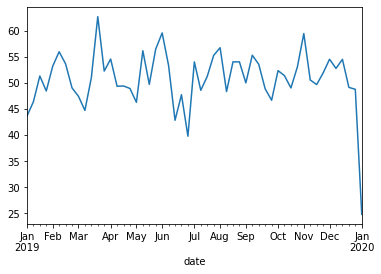

In [138]:
df.resample('W').sum().coffee_consumption.plot()

<AxesSubplot:xlabel='date'>

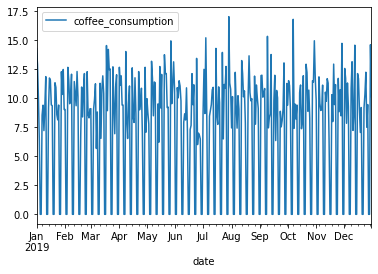

In [137]:
df[['coffee_consumption']].plot()

<AxesSubplot:xlabel='date'>

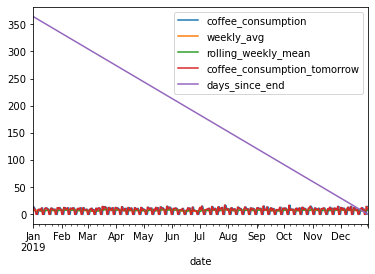

In [136]:
df.plot()

In [ ]:
df.resample('3M').mean().plot(marker='o')